In [51]:
import numpy as np
import pandas as pd
from copy import deepcopy
import sys
from statsbombpy import sb
import mplsoccer
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.projections import get_projection_class
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
import pandas as pd
from copy import deepcopy
import sys

import mplsoccer
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt
from matplotlib.patches import Arc
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.projections import get_projection_class
import matplotlib.patheffects as path_effects

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',50) 

#Loading the libraries
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as path_effects


from mplsoccer.pitch import Pitch, VerticalPitch

from matplotlib.colors import LinearSegmentedColormap
import cmasher as cmr
from mplsoccer.utils import FontManager

In [52]:
free_comps = sb.competitions()

#print a list of free competitions
free_comps

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-07-15T14:15:54.671676,2024-07-15T14:17:00.877356,2024-07-15T14:17:00.877356,2024-07-15T14:15:54.671676
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-06-13T07:51:02.452825,None,None,2024-06-13T07:51:02.452825
3,16,4,Europe,Champions League,male,False,False,2018/2019,2024-06-12T07:44:38.559714,2021-06-13T16:17:31.694,None,2024-06-12T07:44:38.559714
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882
5,16,2,Europe,Champions League,male,False,False,2016/2017,2024-02-13T02:37:32.205154,2021-06-13T16:17:31.694,None,2024-02-13T02:37:32.205154
6,16,27,Europe,Champions League,male,False,False,2015/2016,2024-06-12T07:45:38.786894,2021-06-13T16:17:31.694,None,2024-06-12T07:45:38.786894
7,16,26,Europe,Champions League,male,False,False,2014/2015,2024-02-12T12:49:54.914228,2021-06-13T16:17:31.694,None,2024-02-12T12:49:54.914228
8,16,25,Europe,Champions League,male,False,False,2013/2014,2024-02-12T12:48:48.479157,2021-06-13T16:17:31.694,None,2024-02-12T12:48:48.479157
9,16,24,Europe,Champions League,male,False,False,2012/2013,2024-02-12T12:47:34.340413,2021-06-13T16:17:31.694,None,2024-02-12T12:47:34.340413


In [53]:
comps = sb.competitions()
comps['competition_name'].unique() 

bayer_leverkusn_matches = sb.matches(competition_id=9, season_id=281)

#print the first 5 matches listed
bayer_leverkusn_matches.head()

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3895302,2024-04-14,17:30:00.000,Germany - 1. Bundesliga,2023/2024,Bayer Leverkusen,Werder Bremen,5,0,available,available,2024-05-10T16:57:53.017895,2024-05-10T17:03:59.613154,29,Regular Season,BayArena,Harm Osmers,Xabier Alonso Olano,Ole Werner,1.1.0,2,2
1,3895292,2024-04-06,15:30:00.000,Germany - 1. Bundesliga,2023/2024,Union Berlin,Bayer Leverkusen,0,1,available,available,2024-05-12T21:04:50.061716,2024-05-12T21:08:37.897296,28,Regular Season,Stadion An der Alten Försterei,Benjamin Brand,Nenad Bjelica,Xabier Alonso Olano,1.1.0,2,2
2,3895333,2024-05-05,18:30:00.000,Germany - 1. Bundesliga,2023/2024,Eintracht Frankfurt,Bayer Leverkusen,1,5,available,available,2024-05-14T16:23:06.325967,2024-05-14T16:32:13.483516,32,Regular Season,Deutsche Bank Park,Christian Dingert,Dino Toppmöller,Xabier Alonso Olano,1.1.0,2,2
3,3895340,2024-05-12,20:30:00.000,Germany - 1. Bundesliga,2023/2024,Bochum,Bayer Leverkusen,0,5,available,available,2024-05-14T10:09:25.875345,2024-05-14T16:46:08.459843,33,Regular Season,Vonovia Ruhrstadion,Benjamin Brand,Heiko Butscher,Xabier Alonso Olano,1.1.0,2,2
4,3895348,2024-05-18,16:30:00.000,Germany - 1. Bundesliga,2023/2024,Bayer Leverkusen,Augsburg,2,1,available,available,2024-05-20T10:11:27.857660,2024-05-20T10:33:09.140760,34,Regular Season,BayArena,Matthias Jöllenbeck,Xabier Alonso Olano,Jess Christian Thorup,1.1.0,2,2


In [54]:
#get the matches for a specific team
team="Bayer Leverkusen"

matches_df = bayer_leverkusn_matches [(bayer_leverkusn_matches ['home_team'] == team) | (bayer_leverkusn_matches ['away_team'] == team)]

matches_df=matches_df.sort_values(by='match_date', ascending=False)
matches_df.head(5)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
4,3895348,2024-05-18,16:30:00.000,Germany - 1. Bundesliga,2023/2024,Bayer Leverkusen,Augsburg,2,1,available,available,2024-05-20T10:11:27.857660,2024-05-20T10:33:09.140760,34,Regular Season,BayArena,Matthias Jöllenbeck,Xabier Alonso Olano,Jess Christian Thorup,1.1.0,2,2
3,3895340,2024-05-12,20:30:00.000,Germany - 1. Bundesliga,2023/2024,Bochum,Bayer Leverkusen,0,5,available,available,2024-05-14T10:09:25.875345,2024-05-14T16:46:08.459843,33,Regular Season,Vonovia Ruhrstadion,Benjamin Brand,Heiko Butscher,Xabier Alonso Olano,1.1.0,2,2
2,3895333,2024-05-05,18:30:00.000,Germany - 1. Bundesliga,2023/2024,Eintracht Frankfurt,Bayer Leverkusen,1,5,available,available,2024-05-14T16:23:06.325967,2024-05-14T16:32:13.483516,32,Regular Season,Deutsche Bank Park,Christian Dingert,Dino Toppmöller,Xabier Alonso Olano,1.1.0,2,2
17,3895320,2024-04-27,19:30:00.000,Germany - 1. Bundesliga,2023/2024,Bayer Leverkusen,VfB Stuttgart,2,2,available,available,2024-05-13T17:30:42.626289,2024-05-13T17:38:39.789677,31,Regular Season,BayArena,Felix Zwayer,Xabier Alonso Olano,Sebastian Hoeneß,1.1.0,2,2
18,3895309,2024-04-21,17:30:00.000,Germany - 1. Bundesliga,2023/2024,Borussia Dortmund,Bayer Leverkusen,1,1,available,available,2024-05-10T14:35:19.321055,2024-05-10T14:39:35.216574,30,Regular Season,Signal-Iduna-Park,Daniel Siebert,Edin Terzić,Xabier Alonso Olano,1.1.0,2,2


In [55]:
all_match_ids = matches_df.match_id.unique()
all_match_ids

array([3895348, 3895340, 3895333, 3895320, 3895309, 3895302, 3895292,
       3895286, 3895275, 3895266, 3895258, 3895250, 3895244, 3895232,
       3895220, 3895210, 3895202, 3895194, 3895182, 3895180, 3895167,
       3895158, 3895153, 3895139, 3895134, 3895121, 3895113, 3895107,
       3895095, 3895086, 3895074, 3895067, 3895060, 3895052], dtype=int64)

In [60]:
dfs = []

for match_id in all_match_ids:
    events_df = sb.events(match_id=match_id) 
    events_df=events_df[['team', 'player','type', 'location', 'pass_end_location']]
    events_df = events_df[(events_df['team']=='Bayer Leverkusen') & (events_df['type']=='Pressure') & (events_df['player']=='Florian Wirtz')]
    dfs.append(events_df)
    
all_df = pd.concat(dfs, ignore_index=True)

In [61]:
all_df.head(100)

,team,player,type,location,pass_end_location
0,Bayer Leverkusen,Florian Wirtz,Pressure,"[49.2, 43.5]",NaN
1,Bayer Leverkusen,Florian Wirtz,Pressure,"[37.4, 56.4]",NaN
2,Bayer Leverkusen,Florian Wirtz,Pressure,"[37.3, 55.5]",NaN
3,Bayer Leverkusen,Florian Wirtz,Pressure,"[23.0, 7.3]",NaN
4,Bayer Leverkusen,Florian Wirtz,Pressure,"[13.4, 13.5]",NaN
5,Bayer Leverkusen,Florian Wirtz,Pressure,"[104.8, 27.2]",NaN
6,Bayer Leverkusen,Florian Wirtz,Pressure,"[82.7, 51.6]",NaN
7,Bayer Leverkusen,Florian Wirtz,Pressure,"[39.9, 35.7]",NaN
8,Bayer Leverkusen,Florian Wirtz,Pressure,"[8.1, 9.3]",NaN
9,Bayer Leverkusen,Florian Wirtz,Pressure,"[62.4, 74.9]",NaN


In [62]:

# Group by player and count occurrences
player_counts = all_df.groupby('player').size().reset_index(name='counts')

# Get the top 5 players with the most events
top_players = player_counts.nlargest(10, 'counts')

print(top_players)

          player  counts
0  Florian Wirtz     651


In [63]:
# Convert 'location' column to string if not already
all_df['location'] = all_df['location'].astype(str)

# Remove square brackets and split by comma
all_df[['x', 'y']] = all_df['location'].str.strip('[]').str.split(', ', expand=True)

# Convert the new columns to float
all_df['x'] = all_df['x'].astype(float)
all_df['y'] = all_df['y'].astype(float)

all_df.head(100)

,team,player,type,location,pass_end_location,x,y
0,Bayer Leverkusen,Florian Wirtz,Pressure,"[49.2, 43.5]",NaN,49.2,43.5
1,Bayer Leverkusen,Florian Wirtz,Pressure,"[37.4, 56.4]",NaN,37.4,56.4
2,Bayer Leverkusen,Florian Wirtz,Pressure,"[37.3, 55.5]",NaN,37.3,55.5
3,Bayer Leverkusen,Florian Wirtz,Pressure,"[23.0, 7.3]",NaN,23.0,7.3
4,Bayer Leverkusen,Florian Wirtz,Pressure,"[13.4, 13.5]",NaN,13.4,13.5
5,Bayer Leverkusen,Florian Wirtz,Pressure,"[104.8, 27.2]",NaN,104.8,27.2
6,Bayer Leverkusen,Florian Wirtz,Pressure,"[82.7, 51.6]",NaN,82.7,51.6
7,Bayer Leverkusen,Florian Wirtz,Pressure,"[39.9, 35.7]",NaN,39.9,35.7
8,Bayer Leverkusen,Florian Wirtz,Pressure,"[8.1, 9.3]",NaN,8.1,9.3
9,Bayer Leverkusen,Florian Wirtz,Pressure,"[62.4, 74.9]",NaN,62.4,74.9


In [64]:
all_df= all_df[['x','y']]
all_df.head()

,x,y
0,49.2,43.5
1,37.4,56.4
2,37.3,55.5
3,23.0,7.3
4,13.4,13.5


In [65]:
cmap_dict = cmr.cm.cmap_cd
all_cmap_dict = {}
for cmap_type_key in cmap_dict:
    for key, cmap in cmap_dict[cmap_type_key].items():
        if key[-2:] != '_r':
            all_cmap_dict[key] = cmap

#Creating some Linear Segmented Colors
el_greco_yellow_cmap = LinearSegmentedColormap.from_list("El Greco Yellow - 10 colors",
                                                         ['#7c2e2a', '#f2dd44'], N=10)

pearl_earring_cmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",
                                                       ['#15242e', '#4393c4'], N=10)

path_eff = [path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal()]

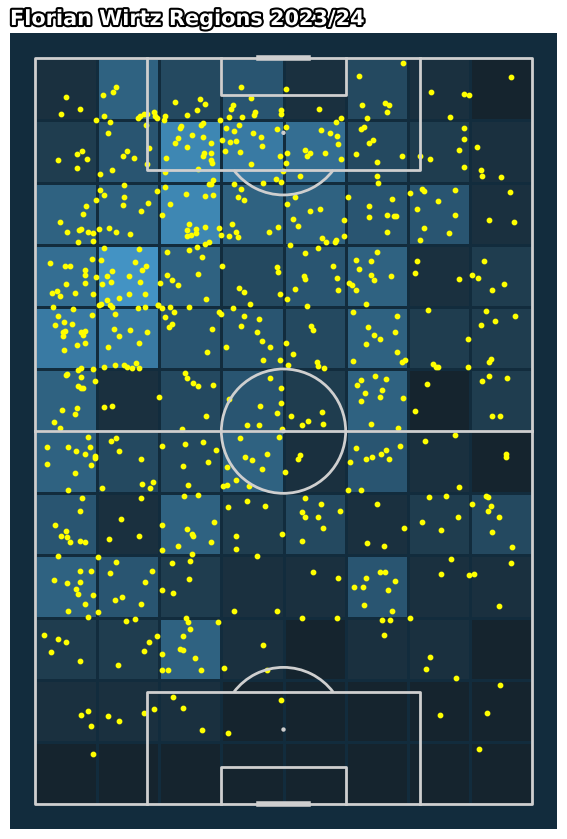

In [66]:
#Heatmap for just the pressure regions
pitch = VerticalPitch(pitch_type='statsbomb', line_color='#cfcfcf', line_zorder=2, pitch_color='#122c3d')

fig, ax = pitch.draw(figsize=(8.5,8.5))
bs = pitch.bin_statistic(all_df.x, all_df.y, bins=(12,8))
heatmap = pitch.heatmap(bs, ax=ax, edgecolors='#122c3d', cmap=pearl_earring_cmap)
ax.set_title('Florian Wirtz Regions 2023/24',
            loc='left', fontweight='bold', fontsize=15, color='white', path_effects=path_eff)
pitch.scatter(all_df.x, all_df.y, s=10, color='yellow', ax=ax)

Text(0.5, 0.5, 'Florian Wirtz 2023/2024')

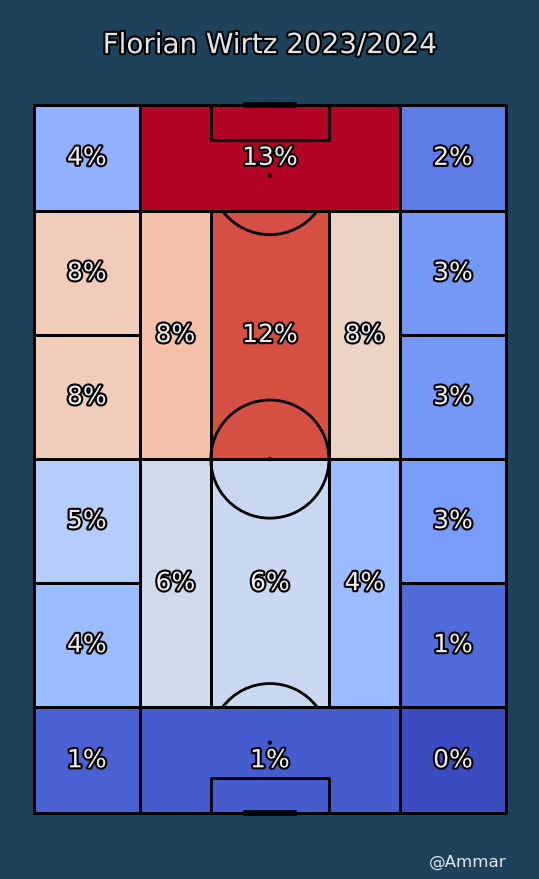

In [67]:
#Heatmap for the Pressure zones as per Juego de Posicion
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#1e4259', line_color='black')
fig, axs = pitch.grid(endnote_height=0.03, endnote_space=0,
                    title_height=0.08, title_space=0,
                    axis=False, grid_height=0.84)

fig.set_facecolor("#1e4259")

bin_statistic = pitch.bin_statistic_positional(all_df.x, all_df.y, statistic='count', positional='full', normalize=True)
pitch.heatmap_positional(bin_statistic, ax=axs['pitch'], edgecolors='black', cmap='coolwarm')
labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                             ax=axs['pitch'], ha='center', va='center',
                             str_format='{:.0%}', path_effects=path_eff)



axs['endnote'].text(1,0.1, '@Ammar', va='center', ha='right', fontsize=12, color='#dee6ea')
axs['title'].text(0.5, 0.5, "Florian Wirtz 2023/2024", color='#dee6ea',
                  va='center', ha='center', path_effects=path_eff, fontsize=20)